Primeras filas del dataset:
     budget movie_id original_language  \
0  30000000      862                en   
1  65000000     8844                en   
2         0    15602                en   
3  16000000    31357                en   
4         0    11862                en   

                                            overview popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...  17.015539   1995-12-15   
2  A family wedding reignites the ancient feud be...    11.7129   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...   3.859495   1995-12-22   
4  Just when George Banks has recovered from his ...   8.387519   1995-02-10   

       revenue  runtime                                   spoken_languages  \
0  373554033.0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2   

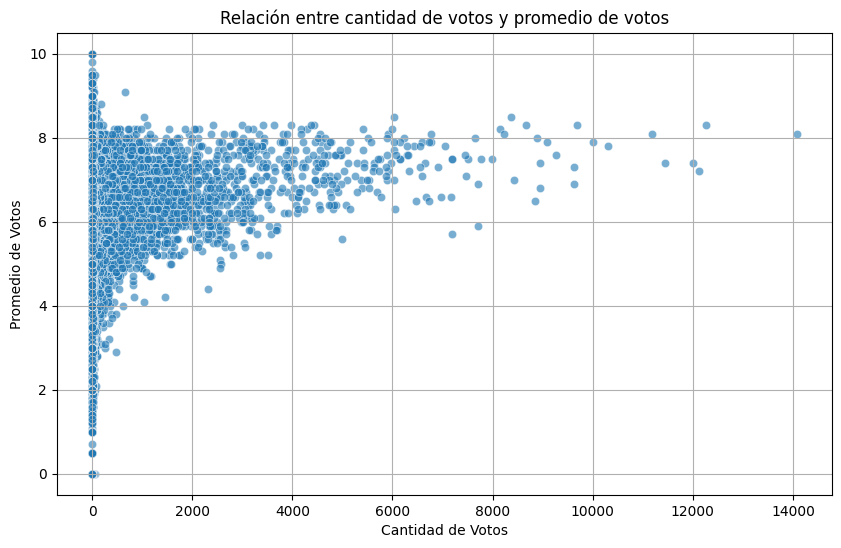

Información para el título: Inception
           title  vote_average  vote_count
15480  Inception           8.1     14075.0


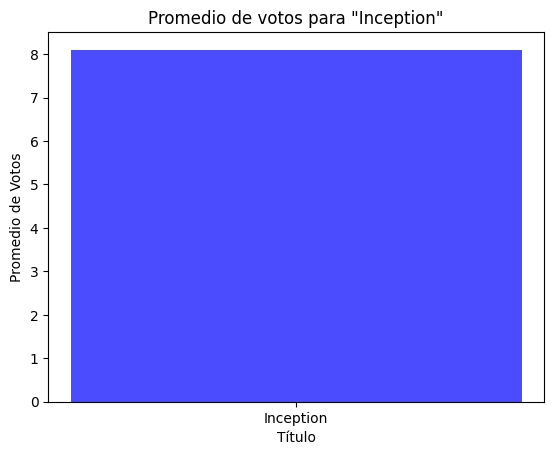

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\movies_datasetc.csv'
movies_df = pd.read_csv(file_path)

# Vista inicial del dataset
print("Primeras filas del dataset:")
print(movies_df.head())

# Resumen de datos faltantes
print("\nDatos faltantes por columna:")
print(movies_df.isnull().sum())

# Convertir columnas clave a tipos adecuados
movies_df['vote_average'] = pd.to_numeric(movies_df['vote_average'], errors='coerce')
movies_df['vote_count'] = pd.to_numeric(movies_df['vote_count'], errors='coerce')

# Eliminar filas con valores faltantes en columnas clave
movies_df = movies_df.dropna(subset=['title', 'vote_average', 'vote_count'])

# Verificar duplicados en los títulos
duplicated_titles = movies_df[movies_df.duplicated(subset=['title'], keep=False)]
print(f"\nTítulos duplicados encontrados: {len(duplicated_titles)}")
print(duplicated_titles[['title', 'vote_average', 'vote_count']].head())

# Análisis global de votos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='vote_count', y='vote_average', alpha=0.6)
plt.title('Relación entre cantidad de votos y promedio de votos')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Promedio de Votos')
plt.grid(True)
plt.show()

# Función para filtrar datos de un título específico
def votos_titulo(titulo_de_la_filmación):
    pelicula = movies_df[movies_df['title'].str.lower() == titulo_de_la_filmación.lower()]
    if pelicula.empty:
        print(f"No se encontró ninguna película con el título: {titulo_de_la_filmación}")
    else:
        print(f"Información para el título: {titulo_de_la_filmación}")
        print(pelicula[['title', 'vote_average', 'vote_count']])
    return pelicula

# Prueba de la función
titulo_test = "Inception"  # Cambia por cualquier título válido en el dataset
resultado = votos_titulo(titulo_test)

# Si se encuentra el título, realizar análisis
if not resultado.empty:
    plt.bar(resultado['title'], resultado['vote_average'], color='blue', alpha=0.7)
    plt.title(f'Promedio de votos para "{titulo_test}"')
    plt.xlabel('Título')
    plt.ylabel('Promedio de Votos')
    plt.show()


In [2]:
def votos_titulo(titulo_de_la_filmacion, movies_df):
    """
    EDA para analizar los votos asociados a un título específico.

    Args:
    - titulo_de_la_filmacion (str): El título de la película a analizar.
    - movies_df (DataFrame): Dataset de películas con columnas como 'title', 'vote_count', y 'vote_average'.
    
    Returns:
    - None. Muestra visualizaciones y resultados clave.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Filtrar por el título
    titulo_df = movies_df[movies_df['title'] == titulo_de_la_filmacion]
    
    if titulo_df.empty:
        print(f"El título '{titulo_de_la_filmacion}' no se encuentra en el dataset.")
        return

    # Extraer información clave del título
    titulo_info = titulo_df.iloc[0]
    votos_promedio = titulo_info['vote_average']
    votos_totales = titulo_info['vote_count']

    print(f"Análisis para el título: {titulo_de_la_filmacion}")
    print(f"- Votos promedio: {votos_promedio}")
    print(f"- Cantidad total de votos: {votos_totales}")
    print(f"- Género(s): {titulo_info.get('genres', 'No disponible')}")
    print(f"- Popularidad: {titulo_info['popularity']}")

    # Comparar con el resto del dataset
    print("\nComparativa con el resto del dataset:")
    print(f"- Promedio general de votos: {movies_df['vote_average'].mean():.2f}")
    print(f"- Mediana de votos promedio: {movies_df['vote_average'].median():.2f}")
    print(f"- Votos promedio del título en percentil: {titulo_df['vote_average'].rank(pct=True).values[0] * 100:.2f}%")

    # Visualización: Distribución de votos promedio
    plt.figure(figsize=(12, 6))
    sns.histplot(movies_df['vote_average'], bins=30, kde=True, color='blue', label='Votos Promedio (Dataset)')
    plt.axvline(x=votos_promedio, color='red', linestyle='--', label=f"{titulo_de_la_filmacion} (votos promedio)")
    plt.title('Distribución de Votos Promedio')
    plt.xlabel('Votos Promedio')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualización: Votos totales vs. promedio
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=movies_df, x='vote_count', y='vote_average', alpha=0.5, label='Dataset')
    plt.scatter(votos_totales, votos_promedio, color='red', label=f"{titulo_de_la_filmacion}", s=100)
    plt.title('Votos Totales vs. Votos Promedio')
    plt.xlabel('Votos Totales')
    plt.ylabel('Votos Promedio')
    plt.legend()
    plt.grid(True)
    plt.show()
